### Question 4: Impact of Semester Performance on Student Outcomes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("spQ4.csv")
df

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target_status
0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,1
1,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,2
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,1
3,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,2
4,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,2
4420,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,1
4421,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,1
4422,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,2


In [3]:
# Map target status into labels for clarity
target_map = {1: "Dropout", 2: "Enrolled", 3: "Graduate"}
df['Target_status_label'] = df['Target_status'].map(target_map)

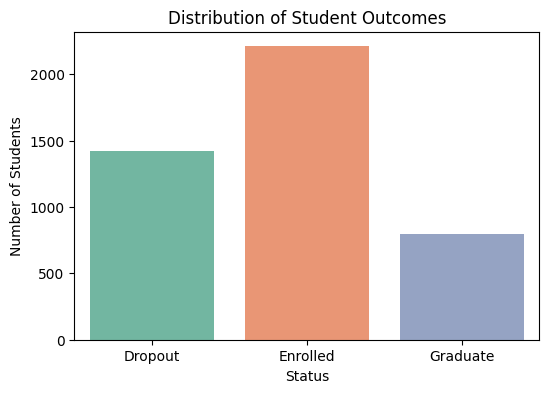

In [4]:
# Exploratory Data Analysis (EDA)
# 1. Distribution of student outcomes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target_status_label', hue='Target_status_label', 
              palette="Set2", legend=False)
plt.title("Distribution of Student Outcomes")
plt.ylabel("Number of Students")
plt.xlabel("Status")
plt.show()

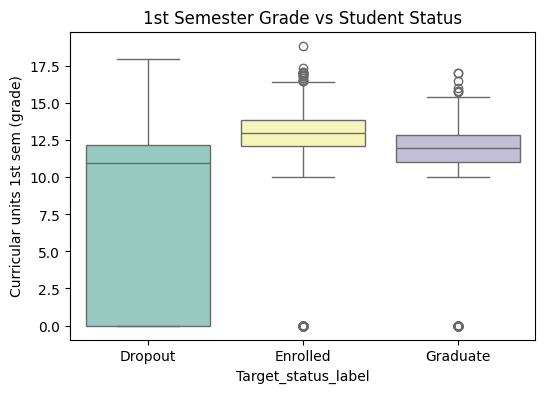

In [5]:
# 2. Boxplot: 1st Semester Grade vs Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Target_status_label', 
            y='Curricular units 1st sem (grade)', 
            hue='Target_status_label', palette="Set3", legend=False)
plt.title("1st Semester Grade vs Student Status")
plt.show()

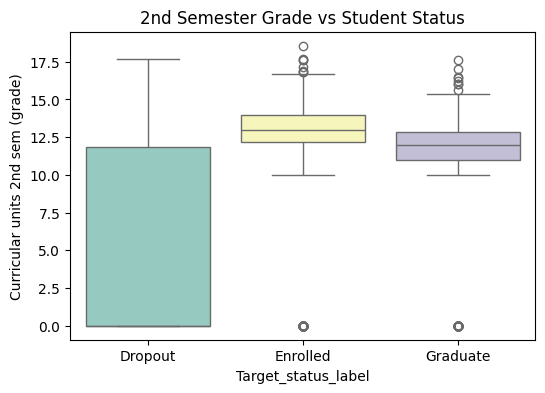

In [6]:
# 3. Boxplot: 2nd Semester Grade vs Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Target_status_label', 
            y='Curricular units 2nd sem (grade)', 
            hue='Target_status_label', palette="Set3", legend=False)
plt.title("2nd Semester Grade vs Student Status")
plt.show()

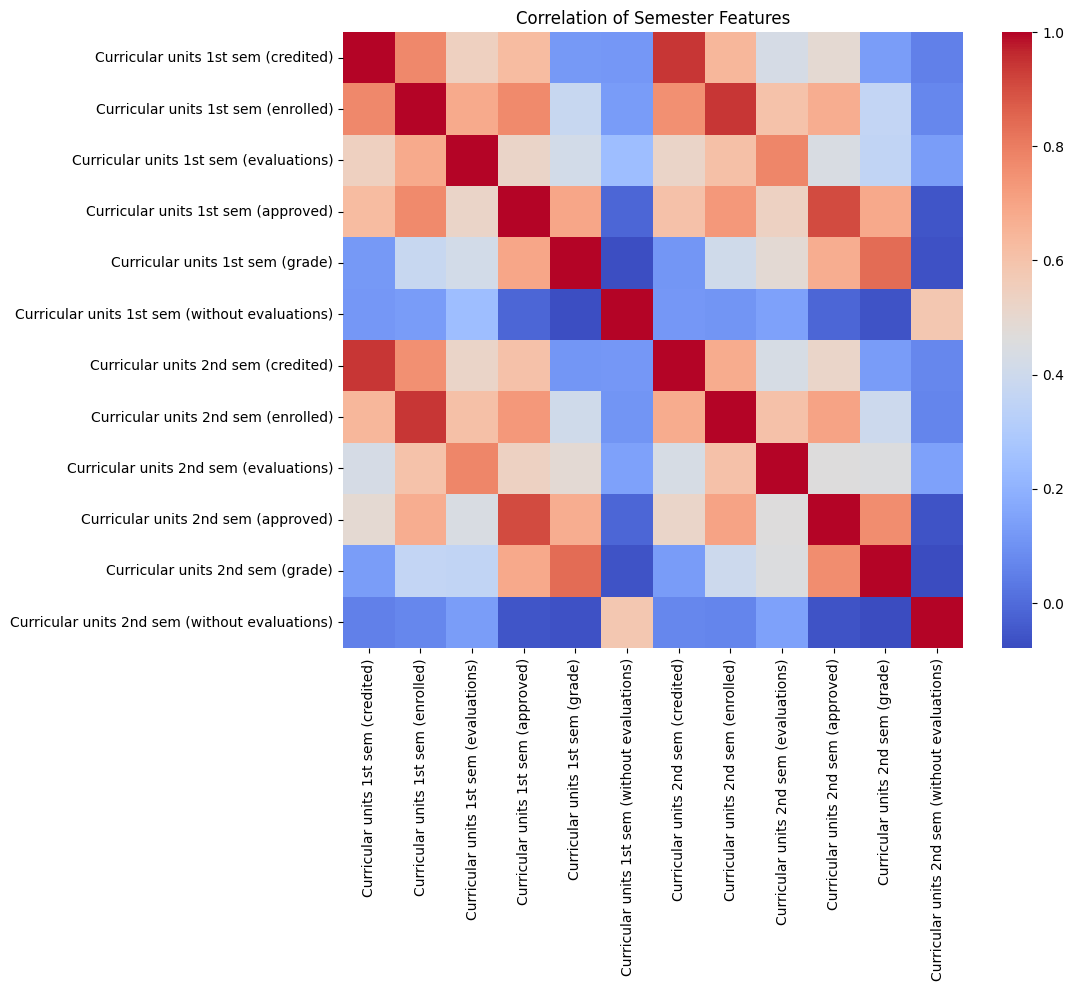

In [7]:
# 4. Correlation heatmap of semester features
sem_features = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]

plt.figure(figsize=(10,8))
sns.heatmap(df[sem_features].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation of Semester Features")
plt.show()

In [9]:
# Predictive Modelling
# Define features (X) and target (y)
X = df[sem_features]
y = df['Target_status']   # encoded as 1=Dropout, 2=Enrolled, 3=Graduate

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
# Classification Report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_map.values()))

=== Classification Report ===
              precision    recall  f1-score   support

     Dropout       0.71      0.74      0.73       441
    Enrolled       0.78      0.86      0.81       642
    Graduate       0.41      0.27      0.33       245

    accuracy                           0.71      1328
   macro avg       0.63      0.62      0.62      1328
weighted avg       0.69      0.71      0.70      1328



In [11]:
# Confusion Matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Confusion Matrix ===
[[326  65  50]
 [ 46 549  47]
 [ 86  92  67]]


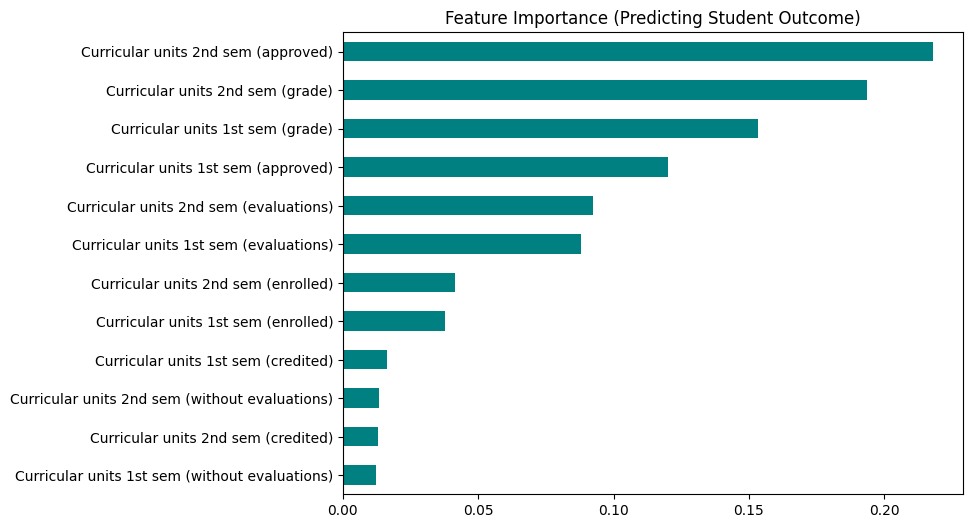

In [12]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=sem_features).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh', color="teal")
plt.title("Feature Importance (Predicting Student Outcome)")
plt.show()